In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score,
confusion_matrix, classification_report ,roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df= pd.read_csv('flattened_Street_dataset.csv')

In [58]:
X = df.drop('label', axis=1)
y = df['label']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce dimensionality with PCA
pca = PCA(n_components=100)  
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)


In [61]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [62]:
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

In [63]:
print(classification_report(y_test, y_pred, target_names=['good', 'holes']))

              precision    recall  f1-score   support

        good       0.93      0.90      0.91      2106
       holes       0.86      0.91      0.89      1526

    accuracy                           0.90      3632
   macro avg       0.90      0.90      0.90      3632
weighted avg       0.90      0.90      0.90      3632



In [64]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

results = pd.DataFrame({
'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
'Score': [f"{acc*100:.2f}%", f"{prec*100:.2f}%", f"{rec*100:.2f}%", f"{f1*100:.2f}%", f"{roc*100:.2f}%"]
})

print("Evaluation Metrics:\n")
print(results)

Evaluation Metrics:

      Metric   Score
0   Accuracy  90.23%
1  Precision  86.48%
2     Recall  90.96%
3   F1-Score  88.66%
4    ROC-AUC  95.34%


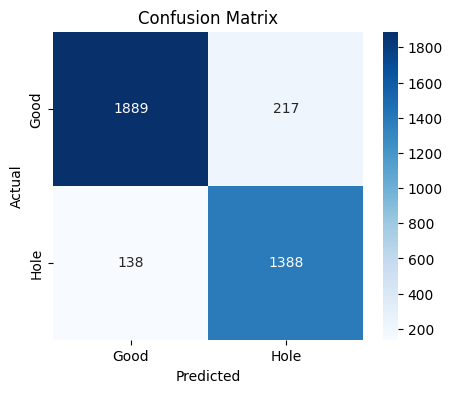

In [65]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Hole'], yticklabels=['Good', 'Hole'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

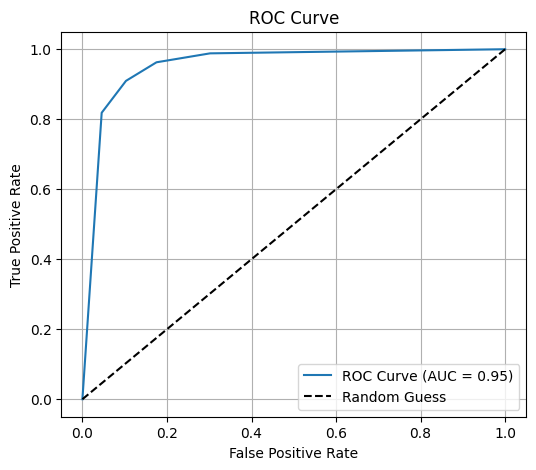

In [66]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\mousa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


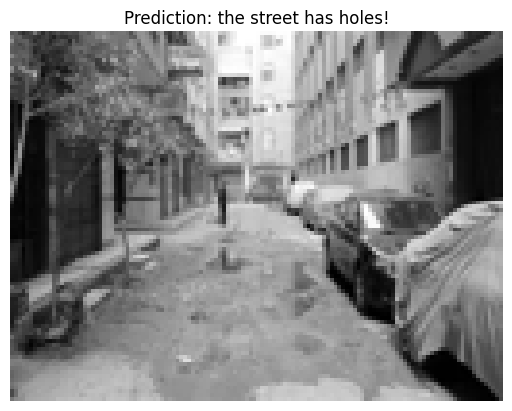

Probability of the street having holes: 1.00


In [67]:
from PIL import Image

def predict_image_pil(image_path):
    # Open image in grayscale
    image = Image.open(image_path).convert('L')

    # Resize to match the dataset shape
    w, h = 128, 96
    image = image.resize((w, h))

    # Convert to array and normalize
    arr = np.array(image) / 255.0
    arr = arr.flatten().reshape(1, -1)

    # Apply the same transformations as training
    arr_scaled = scaler.transform(arr)
    arr_pca = pca.transform(arr_scaled)

    pred = knn.predict(arr_pca)[0]
    proba = knn.predict_proba(arr_pca)[0, 1]

    return image, pred, proba

# Example usage
img, pred, proba = predict_image_pil(r"c:\Users\mousa\Downloads\OIP.webp")
plt.imshow(img, cmap='gray')
label = "the street has holes!" if pred == 1 else "it's a good street"
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()
print(f"Probability of the street having holes: {proba:.2f}")


In [68]:
# # save the KNN model
import joblib
model_filename = 'knn_model.pkl'
joblib.dump(knn, model_filename)
print(f"Model saved to {model_filename}")

Model saved to knn_model.pkl


In [69]:
# Load the model
loaded_model = joblib.load(model_filename)
print(f"Model loaded from {model_filename}")


Model loaded from knn_model.pkl


C:\Users\mousa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


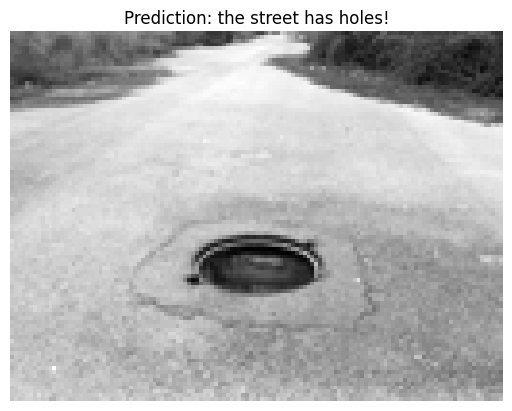

Probability of the street having holes: 1.00


In [70]:
photo_path = r"c:\Users\mousa\Downloads\street-hole-dangerous-missing-manhole-46085691.webp"
img, pred, proba = predict_image_pil(photo_path)

plt.imshow(img, cmap='gray')
label = "the street has holes!" if pred == 1 else "its a good street"
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()
print(f"Probability of the street having holes: {proba:.2f}")